### PERT, Beta & Three-Point Estimation

A continuación se presenta una metodología de estimación paramétrica de distribución de probabilidad que utiliza como base la técnica de estimación **Three-Point Estimation** (https://en.wikipedia.org/wiki/Three-point_estimation) utilizada en *PERT (Project Evaluation and Review Technique)*. La metodología PERT utiliza una **distribución de probabilidad Beta** para suavizar los estimados de **Three-Point Estimation** hacia una distribución aproximadamente Normal o una Log-Normal.


#### Three-Point Estimation
La metodología de tres puntos (también llamado el método PERT) se basa en la definición de tres escenarios:
- **Escenario Optimista**: En este escenario se estima el valor del indicador cuando todos los posibles factores actuan a favor.
- **Escenario Más Probable**: En este estimado se hace uso del mejor conocimiento sobre el proceso o fenómeno, para que, dadas condiciones normales y basado en la experiencia se llegue a un estimado que revele el valor del indicador más probable.
- **Escenario Pesimista**: Este escenario resume el peor caso, en el que se asume que eventos negativos afecten el valor de indicador.
  
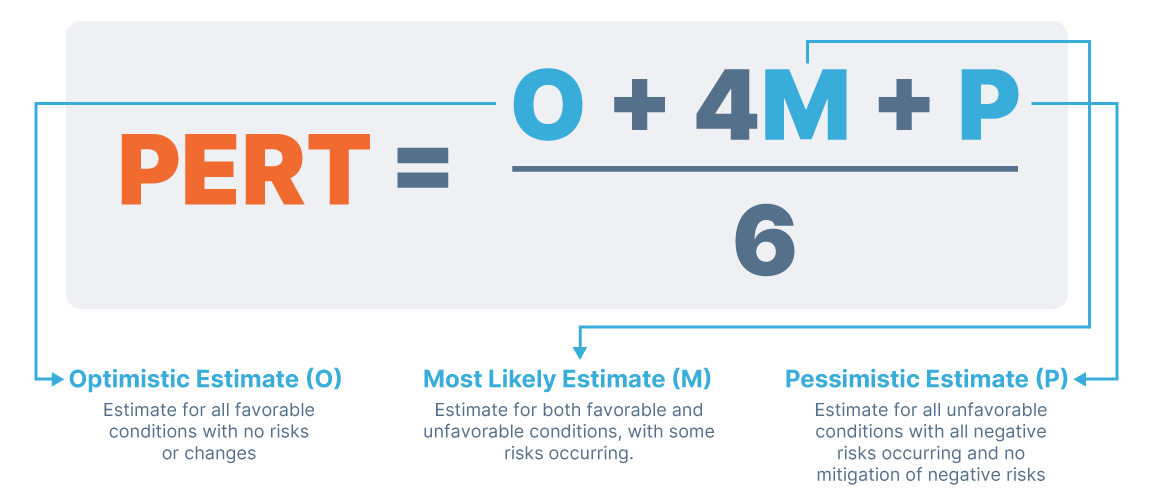

#### Beta-Smoothing

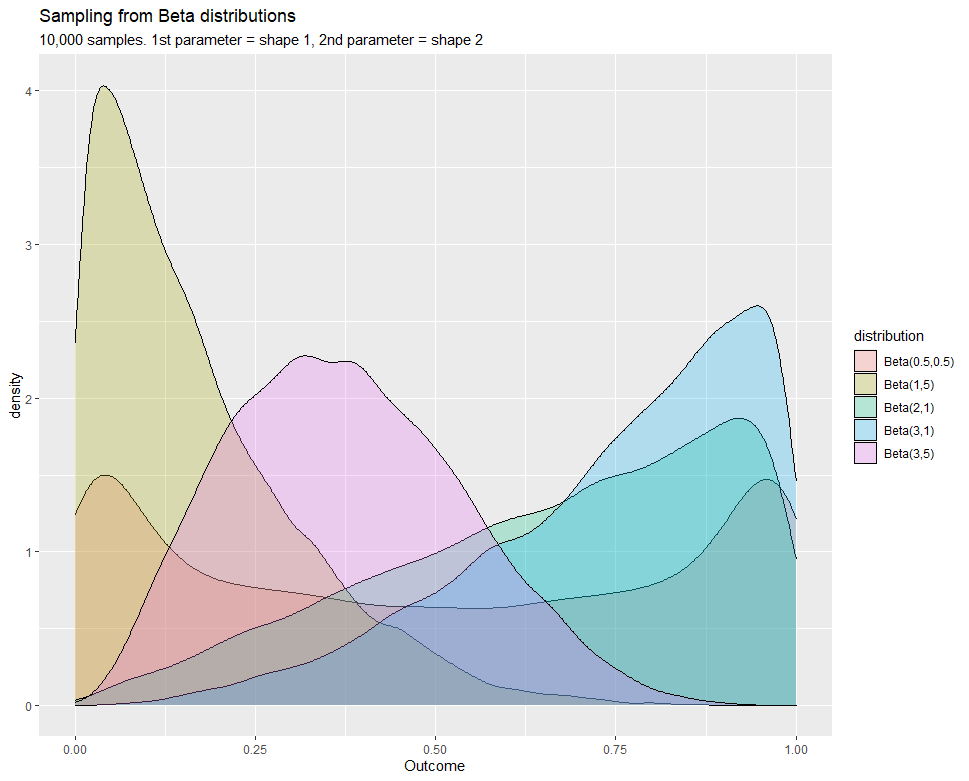

A los estimados del método de **Three-Point Estimation** se les aplica un suavizado para aproximarlo a la distribución **Beta**, relacionándo los parámetros de la siguiente manera:


$$
PERT(O,M,P) = Beta4(a_1,a_2,a,c)
$$

Donde,

$$ 
\mu = \frac{O + \lambda * M + P}{\lambda + 2}
$$

$$
a_1 = \frac{(\mu-O)(2*M-O-P)}{(M-\mu)(P-O)} 
$$

$$
a_2 = \frac{a_1(c-\mu)}{\mu-O}
$$


*Nota: $\lambda$ es usualmente 4, y es un parámetro que sirve para ponderar el resultado más probable de forma que sea más alto que los otros dos.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta

### Función Pert-Beta Smoothing

In [2]:
def pert_beta(a,b,c,l=4):

    if a > c:
        aux = a
        a = c
        c = aux
        
    mu = (a + l * b + c) / (l + 2)
    a1 = ((mu - a) * (2 * b - a - c)) / ((b - mu) * (c - a))
    a2 = (a1 * (c - mu)) / (mu - a)
    data = np.random.beta(a1, a2,10000)
    d = {'Distribución del KPI': data * (c - a) + a}
    df = pd.DataFrame(d)
    sns.set_style('darkgrid')
    sns.histplot(df)
    histogram = np.round(data * (c - a) + a, 2)
    
    return(df,histogram)

### Función de Estimación de Cuantiles Distribución

In [3]:
def quantile(x,quantiles):
    low_quantile = quantiles[0]
    high_quantile = 1 - quantiles[1]
    quantile_list = [low_quantile,high_quantile]
    xsorted = sorted(x['Distribución del KPI'])
    qvalues = [xsorted[int(q * len(xsorted))] for q in quantile_list]
    upper_quantiles = [1 - x for x in quantile_list]
    d = {'P(x <= KPI)':quantile_list,'P(x > KPI)': upper_quantiles, 'KPI': qvalues}
    df = pd.DataFrame(d)

    return(df)

## Ejemplo No. 1: Escenario Optimista Valores Altos (Pesimista Valores Bajos)

Los escenarios optimistas con valores altos (o equivalentemente pesimistas con valores bajos) son aquellos en donde **valores grandes del KPI son deseables sobre los valores bajos**. 

Por ejemplo considere los siguientes escenarios de **TCH en MX**:

- Escenario Optimista: 104 TCH
- Escenario Probable: 100 TCH
- Escenario Pesimista: 90 TCH

Utilizamos las funciones para estimar la probabilidad de los escenarios.

In [4]:
Optimista = 104
Probable = 100
Pesimista = 90

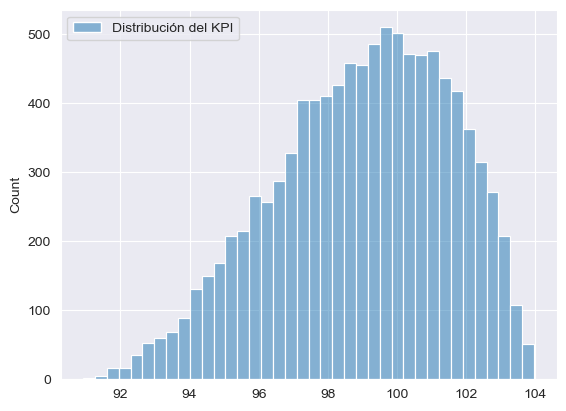

In [5]:
dataframe, hist = pert_beta(Optimista,Probable,Pesimista)

### Probabilidades de Escenarios Optimista, Probable y Pesimista

Asuma que, sobre la definición de escenarios anterior, asociamos la siguientes preguntas: 
- "Cuál es el Escenario *Optimista* que ocurriría con un **20%** de probabilidad?"
- "Cuál es el Escenario *Pesimista* que ocurriría con un **10%** de probabilidad?"

Note que en este caso, el Escenario *Más Probable* queda completamente definido y ocurriría con un **70%** de probabilidad, pues la suma de las probabilidades de todos los escenarios es siempre 100%.


In [6]:
quantiles = quantile(dataframe,[0.2,0.1])
quantiles

,P(x <= KPI),P(x > KPI),KPI
0,0.2,0.8,96.720946
1,0.9,0.1,102.204323


Por lo tanto: 
- Con un **20%** de probabilidad ocurriría un **Escenario Pesimista** donde el TCH es menor o igual a **96.75**
- Con un **10%** de probabilidad ocurriría un **Escenario Optimista** donde el TCH es mayor o igual a **102.22**
- Finalmente, con un **70%** de probabilidad ocurriría un **Escenario Más Probable** donde el TCH estaría entre **96.75** y **102.22**

## Ejemplo No. 2: Escenario Optimista Valores Bajos (Pesimista Valores Altos)

Los escenarios optimistas con valores bajos (o equivalentemente pesimistas con valores altos) son aquellos en donde **valores bajos del KPI son deseables sobre los valores altos**. 

Por ejemplo considere los siguientes escenarios de **Pérdida Indeterminada (%) en PSA**:

- Escenario Optimista: 0.5 %
- Escenario Probable: 1.5 %
- Escenario Pesimista: 5 %

Utilizamos las funciones para estimar la probabilidad de los escenarios.

In [7]:
Optimista = 0.5
Probable = 1.5
Pesimista = 5

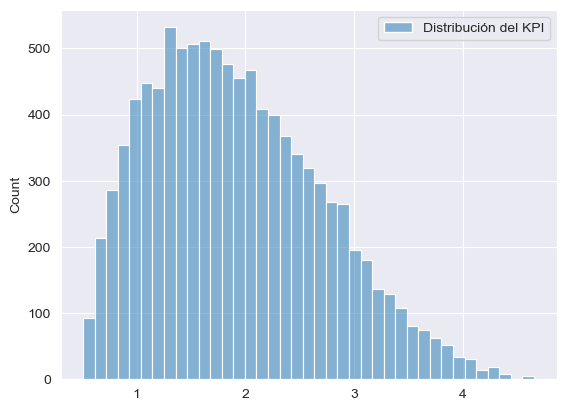

In [8]:
dataframe, hist = pert_beta(Optimista,Probable,Pesimista)

### Probabilidades de Escenarios Optimista, Probable y Pesimista

Asuma que, sobre la definición de escenarios anterior, asociamos la siguientes preguntas: 
- "Cuál es el Escenario *Optimista* que ocurriría con un **15%** de probabilidad?"
- "Cuál es el Escenario *Pesimista* que ocurriría con un **20%** de probabilidad?"

Note que en este caso, el Escenario *Más Probable* queda completamente definido y ocurriría con un **65%** de probabilidad, pues la suma de las probabilidades de todos los escenarios es siempre 100%.


In [9]:
quantiles = quantile(dataframe,[0.15,0.2])
quantiles

,P(x <= KPI),P(x > KPI),KPI
0,0.15,0.85,1.068604
1,0.80,0.20,2.614463


Por lo tanto: 
- Con un **20%** de probabilidad ocurriría un **Escenario Pesimista** donde la pérdida indeterminada es mayor o igual a **2.60**
- Con un **15%** de probabilidad ocurriría un **Escenario Optimista** donde la pérdida indeterminada es menor o igual a **1.08**
- Finalmente, con un **65%** de probabilidad ocurriría un **Escenario Más Probable** donde la pérdida indeterminada estaría entre **1.08** y **2.60**